PROBLEMA 1  Ce îi poate face pe oameni fericiți? Problema analizează predicția gradului de fericire al populației globale
 folosind factori socio-economici precum Produsul Intern Brut pe cap de locuitor (GDP).
 Se utilizează date din anul 2017 pentru a estima scorul de fericire doar în funcție de GDP per capita/ de Produsul intern brut si de gradul de libertate.


STOCHASTIC


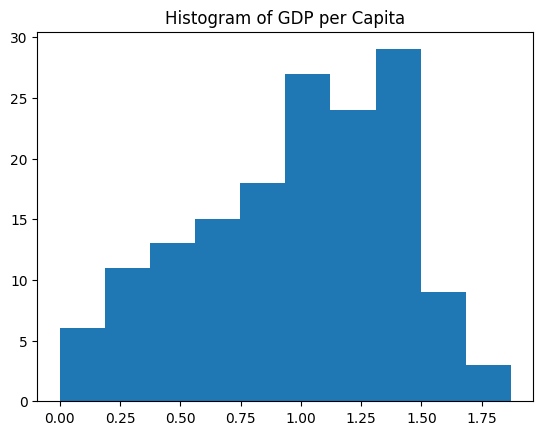

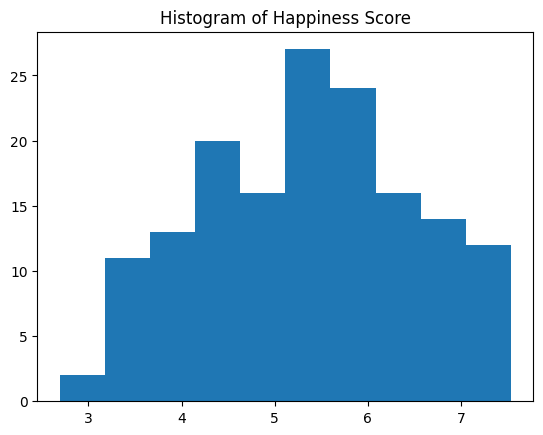

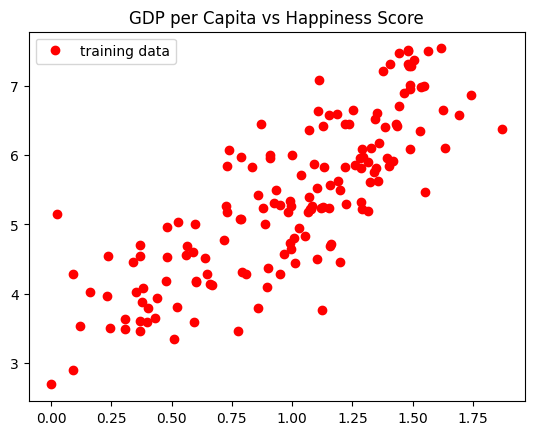

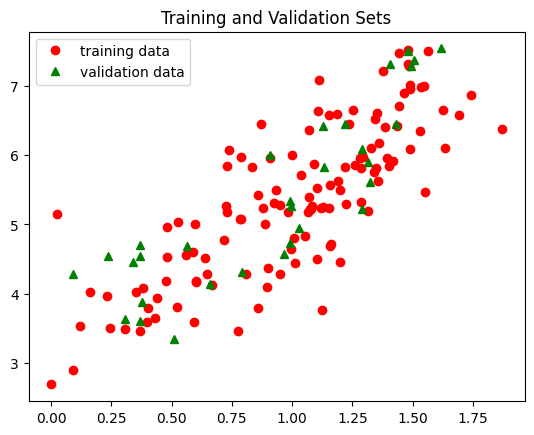

The learnt model: f(x) =  3.1994285956915123  +  2.1487678365481915  * x


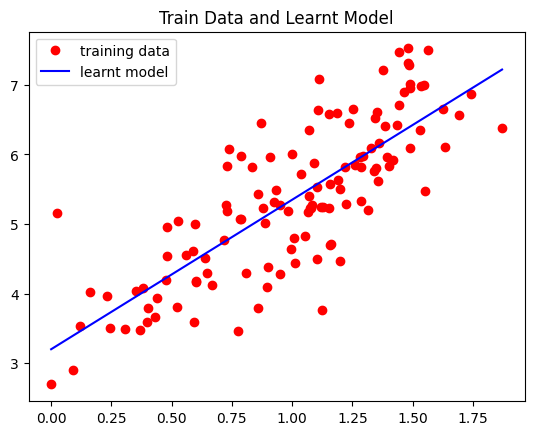

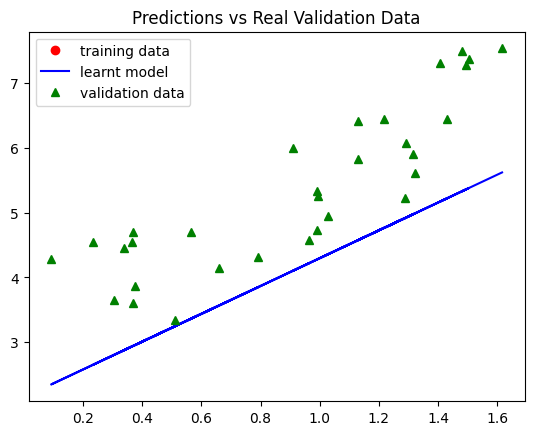

Prediction error (manual): 1.9008773201208433
Prediction error (tool): 1.9008773201208433
BATCH


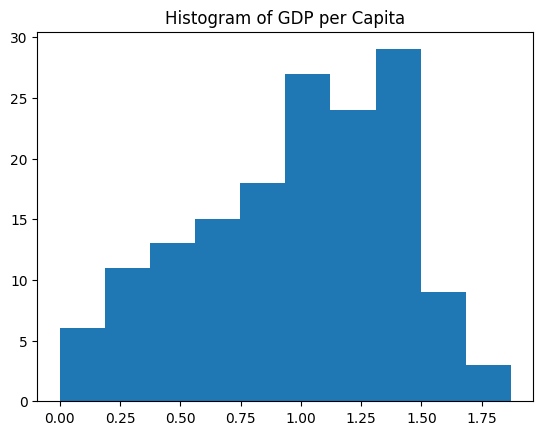

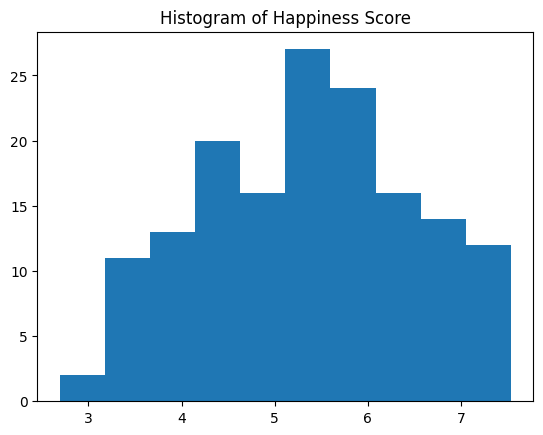

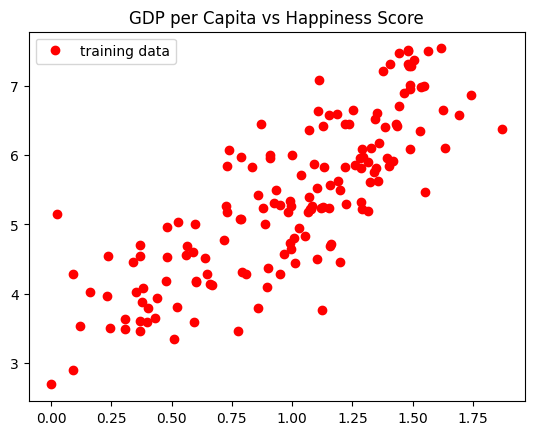

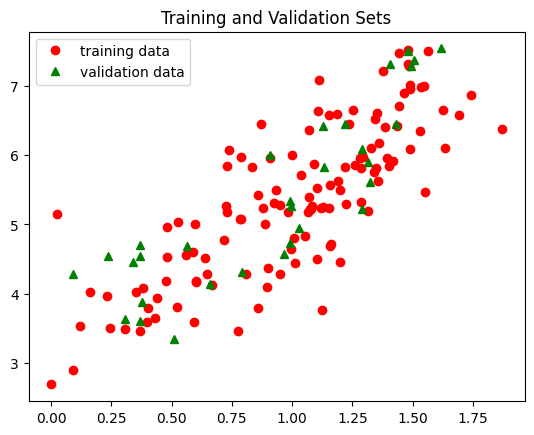

The learnt model: f(x) =  2.2742654392727877  +  2.3731857193577826  * x


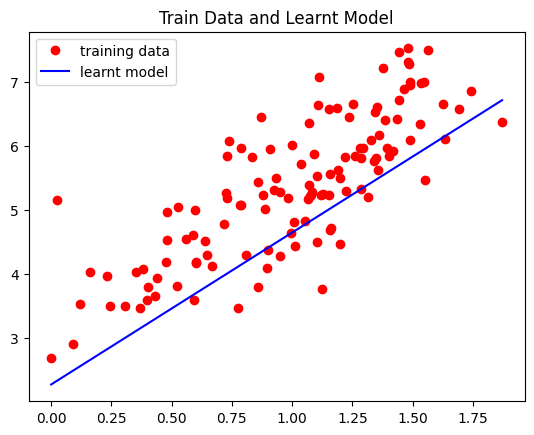

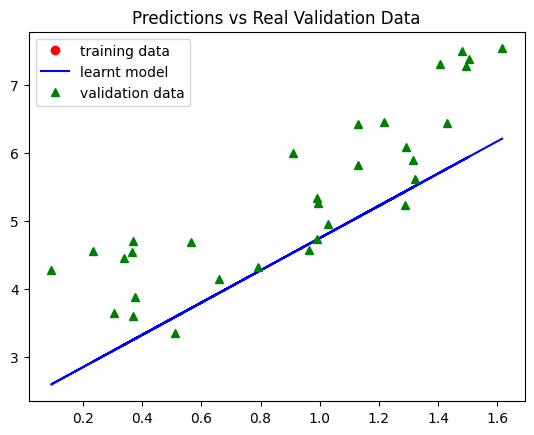

Prediction error (manual): 1.016366392497045
Prediction error (tool): 1.0163663924970447


In [ ]:

import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from SGD import SGD
from MyBGDRegression import MyBGDRegression
from sklearn.metrics import mean_squared_error

def loadData(fileName, inputVarName, outputVarName):
    data = []
    header = []
    with open(fileName) as file:
        reader = csv.reader(file, delimiter=',')
        for idx, row in enumerate(reader):
            if idx == 0:
                header = row
            else:
                data.append(row)
    inputIdx = header.index(inputVarName)
    outputIdx = header.index(outputVarName)
    inputs = [float(row[inputIdx]) for row in data]
    outputs = [float(row[outputIdx]) for row in data]
    return inputs, outputs

def plotHistogram(values, varName):
    plt.hist(values, bins=10)
    plt.title('Histogram of ' + varName)
    plt.show()

def plotData(xTrain, yTrain, xModel=None, yModel=None, xTest=None, yTest=None, title=None):
    plt.plot(xTrain, yTrain, 'ro', label='training data')
    # Check if xModel is not empty and has a size greater than 0
    if xModel is not None and len(xModel) > 0:
        plt.plot(xModel, yModel, 'b-', label='learnt model')
    if xTest is not None and len(xTest) > 0:
        plt.plot(xTest, yTest, 'g^', label='validation data')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

def univariate_regression(modelType):
    crtDir = os.getcwd()
    filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

    inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

    plotHistogram(inputs, 'GDP per Capita')
    plotHistogram(outputs, 'Happiness Score')

    # Check linear relationship between GDP and Happiness Score
    plotData(inputs, outputs, [], [], [], [], 'GDP per Capita vs Happiness Score')

    # Split into training and validation sets (80%-20%)
    np.random.seed(5)
    indices = list(range(len(inputs)))
    trainIdx = np.random.choice(indices, int(0.8 * len(inputs)), replace=False)
    valIdx = [i for i in indices if i not in trainIdx]

    trainInputs = [inputs[i] for i in trainIdx]
    trainOutputs = [outputs[i] for i in trainIdx]
    valInputs = [inputs[i] for i in valIdx]
    valOutputs = [outputs[i] for i in valIdx]

    plotData(trainInputs, trainOutputs, [], [], valInputs, valOutputs, "Training and Validation Sets")

    # Model training
    trainData = [[x] for x in trainInputs]
    if modelType == "stochastic":
        regressor = SGD.MySGDRegression()
    else:
        regressor = MyBGDRegression()
    regressor.fit(trainData, trainOutputs)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    print('The learnt model: f(x) = ', w0, ' + ', w1, ' * x')

    # Plot learnt model
    noOfPoints = 1000
    xref = np.linspace(min(trainInputs), max(trainInputs), noOfPoints)
    yref = [w0 + w1 * x for x in xref]

    plotData(trainInputs, trainOutputs, xref, yref, [], [], "Train Data and Learnt Model")

    # Validation predictions
    valPredictions = regressor.predict([[x] for x in valInputs])
    plotData([], [], valInputs, valPredictions, valInputs, valOutputs, "Predictions vs Real Validation Data")

    # Compute prediction error
    manualError = sum((p - r) ** 2 for p, r in zip(valPredictions, valOutputs)) / len(valOutputs)
    print("Prediction error (manual):", manualError)

    toolError = mean_squared_error(valOutputs, valPredictions)
    print("Prediction error (tool):", toolError)

print("STOCHASTIC")
univariate_regression('stochastic')

print("BATCH")
univariate_regression('batch')



STOCASTIC


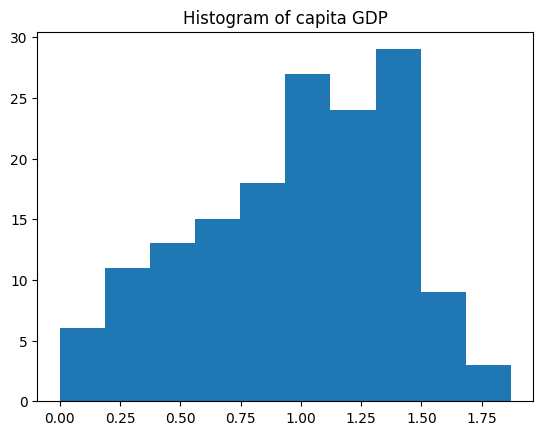

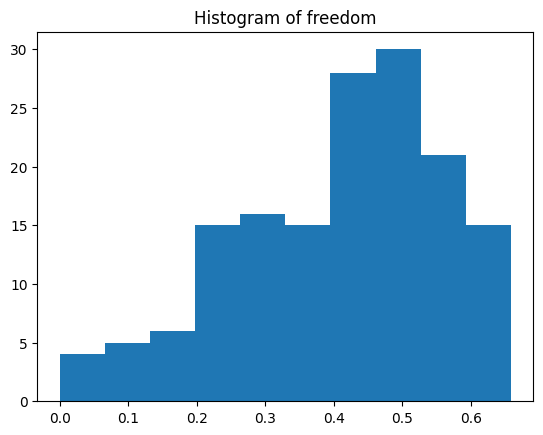

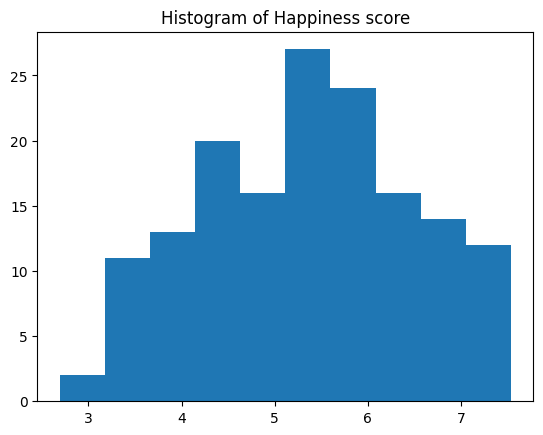

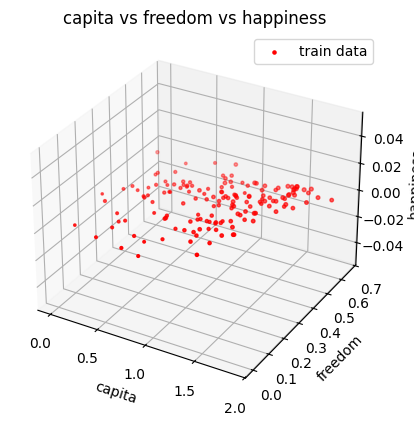

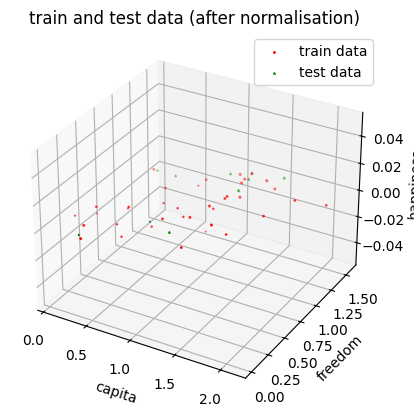

Modelul învățat: f(x) = -0.0014527924544318889 + 0.6978631617347402 * x1 + 0.30375393537641193 * x2


/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


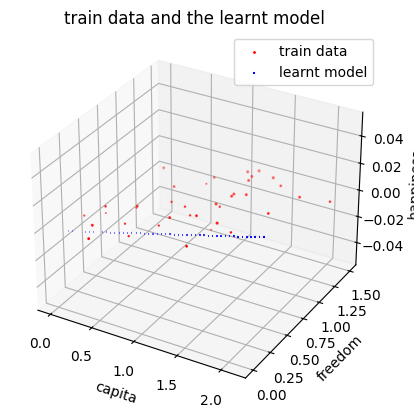

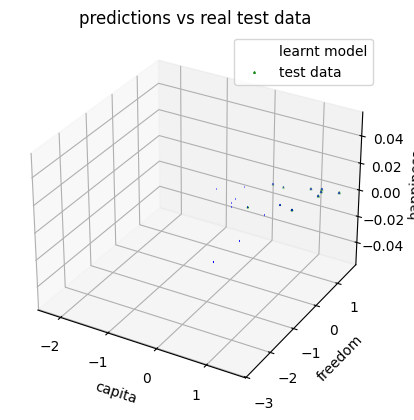

Eroarea predicției: 0.23317939931613166
Eroarea predicției (scikit-learn): 0.23317939931613166
BGD


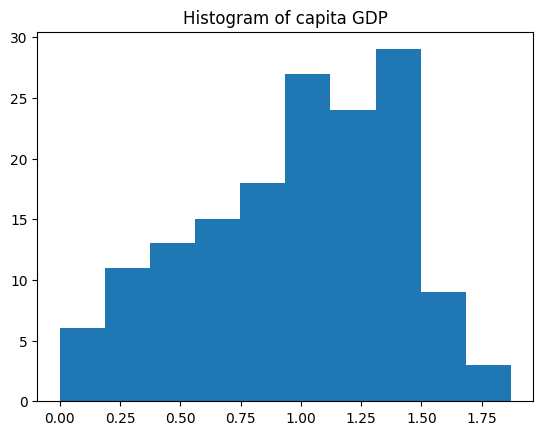

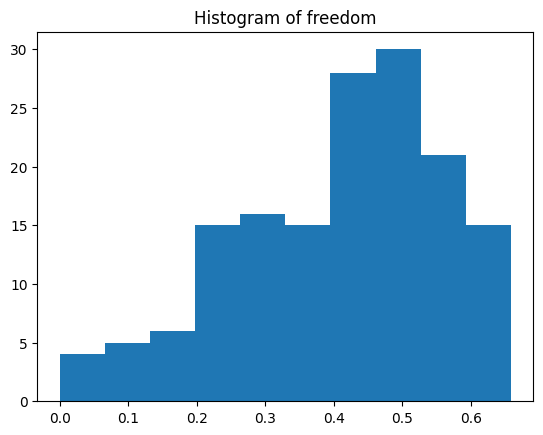

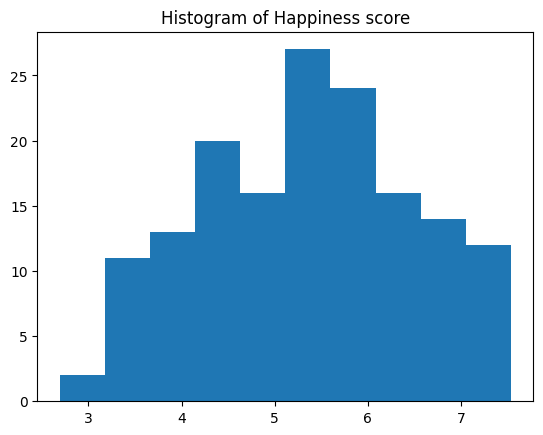

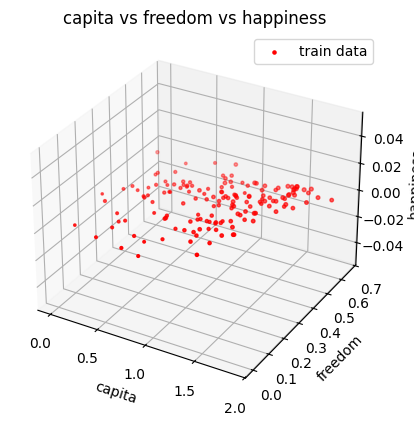

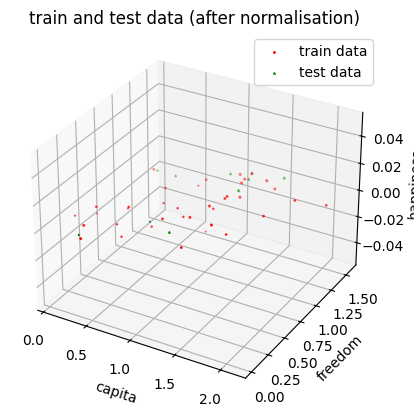

Modelul învățat: f(x) = 9.465524242549624e-17 + 0.46499214073179 * x1 + 0.2738364637432751 * x2


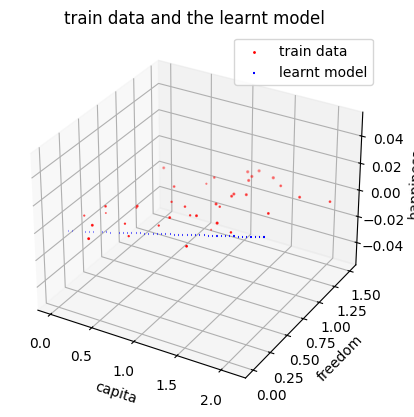

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


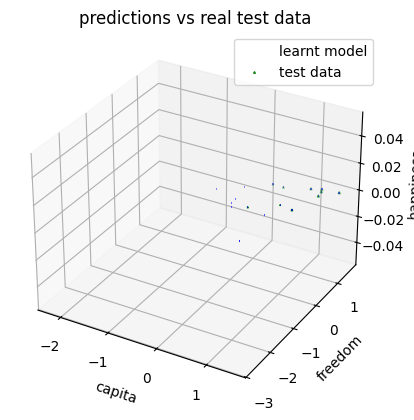

Eroarea predicției: 0.3283735950317628
Eroarea predicției (scikit-learn): 0.3283735950317628


In [ ]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Funcția pentru a afișa datele într-un grafic 3D
def plot3Ddata(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    def remove_negative_values(feature1, feature2, outputs):
        new_feature1, new_feature2, new_outputs = [], [], []
        for f1, f2, out in zip(feature1, feature2, outputs):
            if f1 >= 0 and f2 >= 0 and out >= 0:
                new_feature1.append(f1)
                new_feature2.append(f2)
                new_outputs.append(out)
        return new_feature1, new_feature2, new_outputs

    x1Train, x2Train, yTrain = remove_negative_values(x1Train, x2Train, yTrain)
    if x1Test is not None and x2Test is not None and yTest is not None:
        x1Test, x2Test, yTest = remove_negative_values(x1Test, x2Test, yTest)

    ax = plt.axes(projection='3d')
    if x1Train:
        plt.scatter(x1Train, x2Train, yTrain, c='r', marker='o', label='train data')
    if x1Model:
        plt.scatter(x1Model, x2Model, yModel, c='b', marker='_', label='learnt model')
    if x1Test:
        plt.scatter(x1Test, x2Test, yTest, c='g', marker='^', label='test data')
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

# Funcția pentru histogramele datelor
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title(f'Histogram of {variableName}')
    plt.show()

# Funcția de încărcare a datelor din fișier CSV
def loadDataMoreInputs(fileName, inputVariableNames, outputVariableName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariableNames[0])
    selectedVariable2 = dataNames.index(inputVariableNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariableName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

# Funcția pentru normalizarea datelor
def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]

        scaler.fit(trainData)
        normalisedTrainData = scaler.transform(trainData)
        normalisedTestData = scaler.transform(testData)

        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)
        normalisedTrainData = scaler.transform(trainData)
        normalisedTestData = scaler.transform(testData)
    return normalisedTrainData, normalisedTestData

# Funcția principală pentru implementarea regresiei bivariate
def bivariate_gradient_descent(model):
    crtDir = os.getcwd()
    filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

    inputs, outputs = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

    feature1 = [ex[0] for ex in inputs]
    feature2 = [ex[1] for ex in inputs]

    # Afișează histogramele datelor
    plotDataHistogram(feature1, 'capita GDP')
    plotDataHistogram(feature2, 'freedom')
    plotDataHistogram(outputs, 'Happiness score')

    # Verifică linialitatea relației între variabile
    plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

    # Împarte datele în seturi de antrenament (80%) și testare (20%)
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if i not in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    trainInputs, testInputs = normalisation(trainInputs, testInputs)
    trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

    feature1train = [ex[0] for ex in trainInputs]
    feature2train = [ex[1] for ex in trainInputs]

    feature1test = [ex[0] for ex in testInputs]
    feature2test = [ex[1] for ex in testInputs]

    plot3Ddata(feature1train, feature2train, trainOutputs, [], [], [], feature1test, feature2test, testOutputs, "train and test data (after normalisation)")

    # PASUL 3: Antrenarea modelului
    # Se utilizeaza un regresor personalizat
    from SGD import SGD
    from MyBGDRegression import MyBGDRegression

    regressor = SGD.MySGDRegression() if model == "stocastic" else MyBGDRegression()
    regressor.fit(trainInputs, trainOutputs)

    # Parametrii modelului de regresie
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print(f'Modelul învățat: f(x) = {w0} + {w1} * x1 + {w2} * x2')

    # PASUL 4: Afișează modelul învățat
    noOfPoints = 50
    xref1 = [val for val in np.linspace(min(feature1), max(feature1), noOfPoints)]
    xref2 = [val for val in np.linspace(min(feature2), max(feature2), noOfPoints)]
    yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]

    plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model')

    # PASUL 5: Realizează predicțiile și calculează eroarea
    computedTestOutputs = regressor.predict(testInputs)

    plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')

    # Calculează eroarea predicțiilor
    error = np.mean((np.array(computedTestOutputs) - np.array(testOutputs))**2)
    print(f'Eroarea predicției: {error}')

    from sklearn.metrics import mean_squared_error
    print(f'Eroarea predicției (scikit-learn): {mean_squared_error(testOutputs, computedTestOutputs)}')

# Apelează funcția pentru modelul de regresie stocastică'
print("STOCASTIC")
bivariate_gradient_descent("stocastic")

# Sau pentru regresia folosind metoda BGD
print("BGD")
bivariate_gradient_descent("bgd")

